<a href="https://colab.research.google.com/github/aniruddhamodak/Playstore-Analysis/blob/master/Playstore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [186]:
path = "/content/playstore-analysis (2) (1).csv"
data=pd.read_csv(path)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [187]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **1. Data clean up – Missing value treatment**
# a. Drop records where rating is missing since rating is our target/study variable

In [188]:
data = data.dropna(subset =['Rating'] )
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

## **b. Check the null values for the Android Ver column.**

In [0]:
a= pd.isnull(data['Android Ver'])

In [190]:
data[a]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [191]:
data.shape

(9367, 13)

In [192]:
print("Droping the 3rd record")
data.drop([10472],inplace=True)

Droping the 3rd record


In [193]:
data[a]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [194]:
data.mode()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,FAMILY,4.4,2,21516.529524,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up


In [195]:
print("Replace remaining missing values with the mode in Android Version")
print('________________________________________________________________________')
data['Android Ver'].fillna(data['Android Ver'].mode()[0],inplace=True)
print(data.isnull().sum())
print('________________________________________________________________________')
print("No null Values in Android Ver Coloumn")

Replace remaining missing values with the mode in Android Version
________________________________________________________________________
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64
________________________________________________________________________
No null Values in Android Ver Coloumn


## **C. Current ver – replace with most common value**

In [196]:
print("Checking for null values in Current Ver")
df=pd.isnull(data['Current Ver'])
data[df]

Checking for null values in Current Ver


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [197]:
print("Converted nan values into mode of Current Ver")
print('______________________________________________')
data['Current Ver'].fillna(data['Current Ver'].mode()[0],inplace=True)
print(data.isnull().sum())
print('______________________________________________')
print('No missing Value in  Current Ver')

Converted nan values into mode of Current Ver
______________________________________________
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
______________________________________________
No missing Value in  Current Ver


# **2. Data clean up – correcting the data types**
# a. Which all variables need to be brought to numeric types?

In [198]:
print(" Review, Installs, Price columns can be in Numeric Type")



 Review, Installs, Price columns can be in Numeric Type


# **b. Price variable – remove $ sign and convert to float**
# **c. Installs – remove ‘,’ and ‘+’ sign, convert to integer**
# **d. Convert all other identified columns to numeric**

In [0]:
data['Price'] = data['Price'].str.strip("$")
data['Installs'] = data['Installs'].str.replace('\W',"")
data['Price']=pd.to_numeric(data['Price'],errors='coerce')
data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')
data['Size']=pd.to_numeric(data['Size'],errors='coerce')


In [200]:
data.sample(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2708,Gyft - Mobile Gift Card Wallet,SHOPPING,4.1,9701,14000.000000,500000,Free,0.0,Everyone,Shopping,"July 25, 2018",2.4.0,4.4 and up
1886,Temple Run 2,GAME,4.3,8119151,62000.000000,500000000,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
9103,Numbers Into Words,PRODUCTIVITY,4.4,457,562.000000,50000,Free,0.0,Everyone,Productivity,"May 6, 2014",1.2,2.1 and up
6951,BX Mobile TMC for SAP B1,BUSINESS,4.7,3,11000.000000,100,Free,0.0,Everyone,Business,"January 20, 2015",1.0.16,4.0.3 and up
2597,Whisper,SOCIAL,4.1,205803,21516.529524,5000000,Free,0.0,Teen,Social,"July 18, 2018",Varies with device,Varies with device
1205,Dr. Oetker recipe ideas,FOOD_AND_DRINK,4.2,8509,17000.000000,1000000,Free,0.0,Everyone,Food & Drink,"July 12, 2018",3.5.5,4.0.3 and up
3204,HomeAway Vacation Rentals,TRAVEL_AND_LOCAL,4.3,30403,21516.529524,5000000,Free,0.0,Everyone,Travel & Local,"August 1, 2018",Varies with device,Varies with device
5781,Adventure Xpress,FAMILY,4.2,24775,30000.000000,100000,Free,0.0,Everyone 10+,Puzzle,"October 12, 2015",1.2.1,2.3.3 and up


# 3. Sanity checks – check for the following and handle accordingly
## a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore Are there any such records? Drop if so.

In [201]:
data=data[data['Rating'].between(1,5)]

print("Maximum Rating" , data['Rating'].max())
print("Minimum Rating", data['Rating'].min())

Maximum Rating 5.0
Minimum Rating 1.0


# b. Reviews should not be more than installs as only those who installed can review the app. 
# i. Are there any such records? Drop if so.

In [202]:
data['Installs']=data['Installs'].apply(pd.to_numeric,downcast='integer')
data=data[data['Reviews'] < data['Installs']]

df = pd.DataFrame(data[['App','Reviews','Installs']])
print(df)

                                                     App  Reviews  Installs
0         Photo Editor & Candy Camera & Grid & ScrapBook      159     10000
1                                    Coloring book moana      967    500000
2      U Launcher Lite – FREE Live Cool Themes, Hide ...    87510   5000000
3                                  Sketch - Draw & Paint   215644  50000000
4                  Pixel Draw - Number Art Coloring Book      967    100000
...                                                  ...      ...       ...
10834                                      FR Calculator        7       500
10836                                   Sya9a Maroc - FR       38      5000
10837                   Fr. Mike Schmitz Audio Teachings        4       100
10839                      The SCP Foundation DB fr nn5n      114      1000
10840      iHoroscope - 2018 Daily Horoscope & Astrology   398307  10000000

[9357 rows x 3 columns]


# 4. Identify and handle outliers

# Price Column

# i. Make suitable plot to identify outliers in price

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

Ploting Boxplot graph for Price column


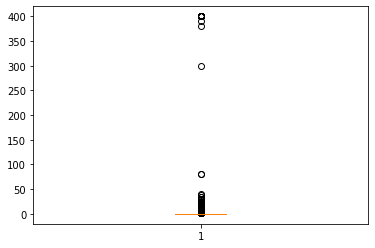

In [204]:
print("Ploting Boxplot graph for Price column")
plt.boxplot(data['Price']);

# ii. Do you expect apps on the play store to cost $200? Check out these cases

In [205]:
data=data[data['Price']<200]
print("MaxPrice is $", data['Price'].max())

MaxPrice is $ 79.99


# iii. After dropping the useless records, make the suitable plot again to identify outliers

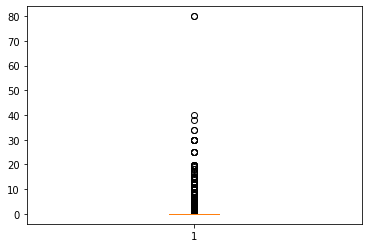

In [206]:
plt.boxplot(data['Price']);

# iv. Limit data to records with price < $30

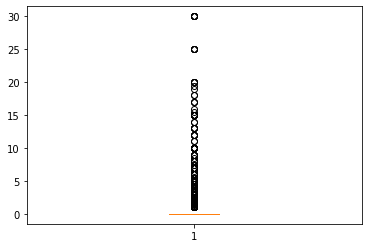

In [207]:
data=data[data['Price']<30]
plt.boxplot(data['Price']);

# b. Reviews column
# i. Make suitable plot
# ii. Limit data to apps with < 1 Million reviews

In [208]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


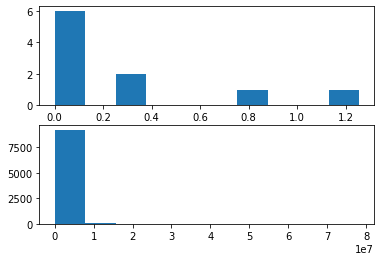

In [209]:
plt.subplot(2,1,1)
plt.hist(data['Reviews'].sample(10));


plt.subplot(2,1,2)
plt.hist(data["Reviews"]);

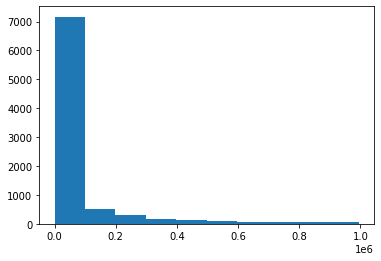

In [210]:
data=data[data['Reviews']<1000000]
plt.hist(data["Reviews"]);

# c. Installs
# i. What is the 95th percentile of the installs?
# ii. Drop records having a value more than the 95th percentile

In [211]:
data["Installs"].quantile(0.95)

10000000.0

In [212]:
p = np.percentile(data['Installs'], 95) # return 95th percentile, e.g median.
print(p)

10000000.0


In [0]:
data['Installs'] = data['Installs'].quantile(0.95) #Droping records having a value more than the 95th percentile

In [218]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1590,H Pack,LIFESTYLE,4.3,9412,1700.000000,10000000.0,Free,0.0,Everyone,Lifestyle,"December 17, 2016",1.5.1,4.0.3 and up
1492,Apartment Decorating Ideas,HOUSE_AND_HOME,3.9,1478,5700.000000,10000000.0,Free,0.0,Everyone,House & Home,"March 13, 2015",1.2,3.0 and up
1198,Easy and quick desserts,FOOD_AND_DRINK,4.6,1398,10000.000000,10000000.0,Free,0.0,Everyone 10+,Food & Drink,"June 14, 2018",1.0,4.0.3 and up
4287,K PLUS,FINANCE,4.4,124324,21516.529524,10000000.0,Free,0.0,Everyone,Finance,"June 26, 2018",4.6.0,4.2 and up
8964,GoAction,VIDEO_PLAYERS,3.6,1522,65000.000000,10000000.0,Free,0.0,Everyone,Video Players & Editors,"July 17, 2018",V1.5.3,4.4 and up
8089,Cy-Ranch,NEWS_AND_MAGAZINES,4.5,27,7100.000000,10000000.0,Free,0.0,Everyone,News & Magazines,"May 6, 2018",7.5.0,4.1 and up
753,C++ Tutorials,EDUCATION,4.1,358,1900.000000,10000000.0,Free,0.0,Everyone,Education,"August 21, 2014",1.1,2.3 and up
1352,My Days - Ovulation Calendar & Period Tracker ™,HEALTH_AND_FITNESS,4.5,93691,21516.529524,10000000.0,Free,0.0,Everyone,Health & Fitness,"July 5, 2018",Varies with device,Varies with device
4326,SpongeBob Diner Dash,FAMILY,4.0,576210,48000.000000,10000000.0,Free,0.0,Everyone,Casual,"August 22, 2013",3.25.3,2.3.3 and up
508,Free Dating & Flirt Chat - Choice of Love,DATING,4.0,42194,21516.529524,10000000.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",Varies with device,Varies with device


In [222]:
print("Maximum Percentile in Installs is " , data['Installs'].max() , ", Which is less than 95  percentile")

Maximum Percentile in Installs is  10000000.0 , Which is less than 95  percentile


# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
# a. How do you explain this?

In [223]:
data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8132,Security Camera CZ,HOUSE_AND_HOME,4.4,137,19000.0,10000000.0,Free,0.0,Everyone,House & Home,"July 17, 2018",1.1.10,4.1 and up
6134,Photo BG Changer,PHOTOGRAPHY,3.8,11,17000.0,10000000.0,Free,0.0,Everyone,Photography,"February 21, 2018",1.3,4.1 and up
3836,Gps Route Finder,MAPS_AND_NAVIGATION,4.4,652,3400.0,10000000.0,Free,0.0,Everyone,Maps & Navigation,"May 26, 2018",116,4.1 and up


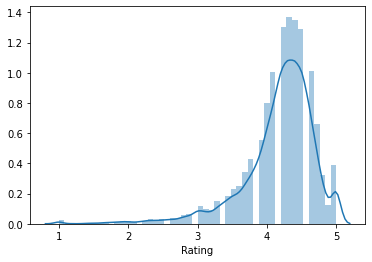

In [228]:
sns.distplot(data["Rating"]);

In [229]:
print("From the above plot we can conclude that Ratings are  more skewed twoards the higher valuses that is between 4 & 5")

___________________________________
From the above plot we can conclude that Ratings are  more skewed twoards the higher valuses that is between 4 & 5


# 6. What are the top Content Rating values?
# a. Are there any values with very few records?
# b. If yes, drop those as they won’t help in the analysis

In [234]:
data.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3,3
Everyone,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941
Everyone 10+,337,337,337,337,337,337,337,337,337,337,337,337
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,933,933,933,933,933,933,933,933,933,933,933,933
Unrated,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
# From above  we can conclude that 'Adults only 18+' & 'Unrated' has a very few records. So We can drop that records.

In [248]:
data = data[data['Content Rating'] != 'Unrated']
data = data[data['Content Rating'] != 'Adults only 18+']
data.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941
Everyone 10+,337,337,337,337,337,337,337,337,337,337,337,337
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,933,933,933,933,933,933,933,933,933,933,933,933


## 7. Effect of size on rating
## a. Make a joinplot to understand the effect of size on rating
## b. Do you see any patterns?
## c. How do you explain the pattern?

In [249]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,10000000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,10000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,10000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,10000000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


As the size is very low ratings are less
And for the lareger size of app ratings  are less 
Therefore from the below jointplot we can conclude that Higest Rating for the moderate size of app


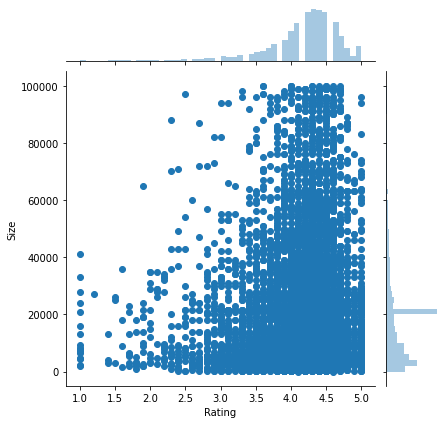

In [256]:
sns.jointplot(x="Rating",y="Size", data = data);

print("As the size is very low ratings are less")
print("And for the lareger size of app ratings  are less ")
print("Therefore from the below jointplot we can conclude that Higest Rating for the moderate size of app")

# **8. Effect of price on rating**
## a. Make a jointplot (with regression line)
## b. What pattern do you see?
## c. How do you explain the pattern?
## d. Replot the data, this time with only records with price > 0
## e. Does the pattern change?
## f. What is your overall inference on the effect of price on the rating

We can  see  a  pattern that most  of the heighest rating apps priced betwwen $0 to $5
From the regession line we  can conclude that heigest prized apps has a  moderate ratings.


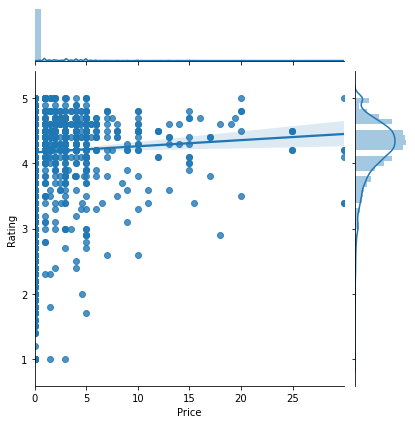

In [265]:
sns.jointplot(x="Price", y="Rating", data=data, kind="reg");
print("We can  see  a  pattern that most  of the heighest rating apps priced betwwen $0 to $5")
print("From the regession line we  can conclude that heigest prized apps has a  moderate ratings.")

In [0]:
data1 = data[data['Price'] != 0]

We can  see  a  pattern that most  of the heighest rating apps priced betwwen upto $5
very few high priced app are having a greater tha 3 ratings. 
From the regession line we  can conclude that very few heigest prized apps has a top ratings.


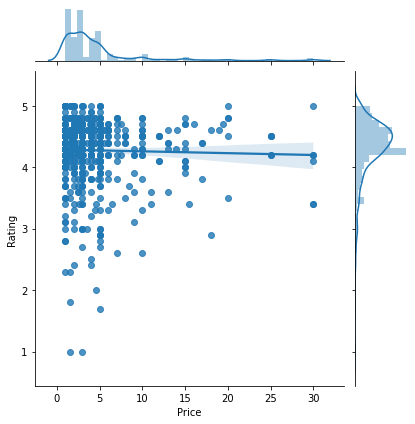

In [271]:
sns.jointplot(x="Price", y="Rating", data = data1, kind="reg");
print("We can  see  a  pattern that most  of the heighest rating apps priced betwwen upto $5")
print("very few high priced app are having a greater tha 3 ratings. ")
print("From the regession line we  can conclude that very few heigest prized apps has a top ratings.")

# **9. Look at all the numeric interactions together –**
# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

In [273]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,10000000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,10000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,10000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,10000000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


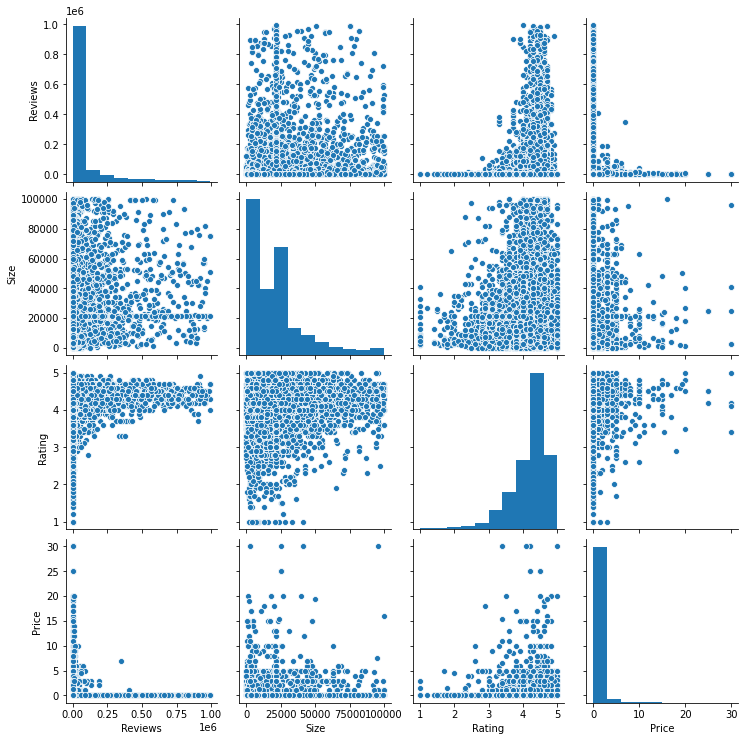

In [275]:
sns.pairplot(data, vars=["Reviews","Size","Rating","Price"]);

# 10. Rating vs. content rating
# a. Make a bar plot displaying the rating for each content rating
# b. Which metric would you use? Mean? Median? Some other quantile?
# c. Choose the right metric and plot

In [305]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,10000000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,10000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,10000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,10000000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


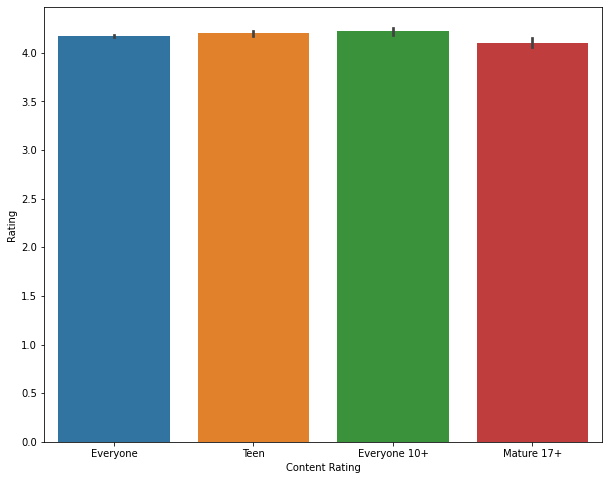

In [308]:
plt.subplots(figsize = (10,8))
sns.barplot('Content Rating','Rating',data=data);

In [317]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,8628.000000,8628.000000,8628.000000,8628.0,8628.000000
mean,4.172288,68421.335767,21642.277584,10000000.0,0.325139
std,0.528932,156382.782103,20666.388624,0.0,1.731943
min,1.000000,1.000000,8.500000,10000000.0,0.000000
25%,4.000000,143.750000,6000.000000,10000000.0,0.000000
50%,4.300000,3641.000000,18000.000000,10000000.0,0.000000
75%,4.500000,46117.750000,26000.000000,10000000.0,0.000000
max,5.000000,995002.000000,100000.000000,10000000.0,29.990000


# 11. Content rating vs. size vs. rating – 3 variables at a time
# a. Create 5 buckets (20% records in each) based on Size

In [319]:
data.count()

App               8628
Category          8628
Rating            8628
Reviews           8628
Size              8628
Installs          8628
Type              8628
Price             8628
Content Rating    8628
Genres            8628
Last Updated      8628
Current Ver       8628
Android Ver       8628
dtype: int64

In [323]:
8628/5

1725.6

In [325]:
np.array_split(data, 5)  # Creating a 5  Buckets each having a 1725 values.

[                                                    App  ...   Android Ver
 0        Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
 1                                   Coloring book moana  ...  4.0.3 and up
 2     U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
 3                                 Sketch - Draw & Paint  ...    4.2 and up
 4                 Pixel Draw - Number Art Coloring Book  ...    4.4 and up
 ...                                                 ...  ...           ...
 2070  Baby ABC in box! Kids alphabet games for toddl...  ...    4.1 and up
 2071                            Henry Danger Crime Warp  ...    4.4 and up
 2072                         Thomas & Friends: Race On!  ...    4.4 and up
 2073      Super School: Educational Kids Games & Rhymes  ...    5.0 and up
 2074                                   Fruit Cube Blast  ...    4.1 and up
 
 [1726 rows x 13 columns],
                                     App  ...         Andro

## b.By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination